# 1. Machine Learning Methods

In this notebook I'll be exploring the results of the following Machine Learning methods for our fraud detection problem using only their default settings:

* Logistic Regression
* Decision Tree
* Naive Bayes
* KNN

We'll be exploring how they compare against each other and these results will be used as a baseline to be compared against our better methods later

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, cross_val_predict, StratifiedShuffleSplit, train_test_split


import fraudutils as futils
import warnings

warnings.filterwarnings(action='once')

%load_ext autoreload
%autoreload 2
%matplotlib inline

Our data will be loaded using the 60/30/10 splitting ratio

In [2]:
train, test, _ = futils.load_train_test_val_dataset('../../../data/processed/give-me-some-credit/')

X_train = train.drop(['SeriousDlqin2yrs'], axis=1)
y_train = train['SeriousDlqin2yrs']

X_test = test.drop(['SeriousDlqin2yrs'], axis=1)
y_test = test['SeriousDlqin2yrs']

I'll be comparing classifiers the result of our classifiers applying undersampling and oversampling as shown bellow.

The metrics used below are accuracy, precision and recall, these are defined as:

$$Accuracy = \dfrac{TruePositive + TrueNegative}{TruePositive + FalsePositive + TrueNegative + FalseNegative}$$

$$Precision = \dfrac{TruePositive}{TruePositive + FalsePositive}$$

$$Recall = \dfrac{TruePositive}{TruePositive + TrueNegative}$$

In this analysis I'll be considering fraudulent examples as positives and non-fraudulents as negatives.

With the previous data split, we should have:

In [3]:
print("Train Data:")
print("Non-fraudulent: {}".format(len([x for x in y_train if x == 0])))
print("Fraudulent: {}".format(len([x for x in y_train if x == 1])))

print("\nTest Data:")
print("Non-fraudulent: {}".format(len([x for x in y_test if x == 0])))
print("Fraudulent: {}".format(len([x for x in y_test if x == 1])))

Train Data:
Non-fraudulent: 83984
Fraudulent: 6016

Test Data:
Non-fraudulent: 41992
Fraudulent: 3008


In [4]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, make_scorer, confusion_matrix, average_precision_score, roc_auc_score

scoring={'recall': make_scorer(recall_score),
         'precision': make_scorer(precision_score),
         'accuracy': make_scorer(accuracy_score),
         'aucpr': make_scorer(average_precision_score),
         'aucroc': make_scorer(roc_auc_score)}

In [5]:
c_scores = {}

### Running Classifiers

Logistic regression results:
Mean accuracy: 0.9333111111111111
Mean precision: 0.5421686746987951
Mean recall: 0.014960106382978724
AUPRC: 0.073955345495457
AUROC: 0.507027586054892


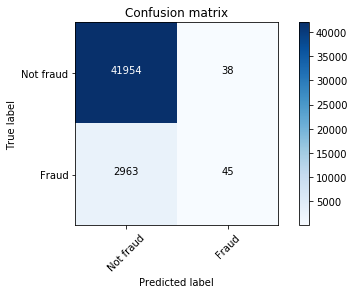


Decision tree results:
Mean accuracy: 0.8966888888888889
Mean precision: 0.2509863429438543
Mean recall: 0.27493351063829785
AUPRC: 0.11747122305448832
AUROC: 0.6080802055001358


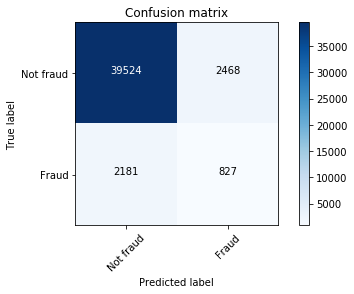


Naive Bayes results:
Mean accuracy: 0.9322222222222222
Mean precision: 0.390625
Mean recall: 0.024933510638297872
AUPRC: 0.07491743037086289
AUROC: 0.5110736328196253


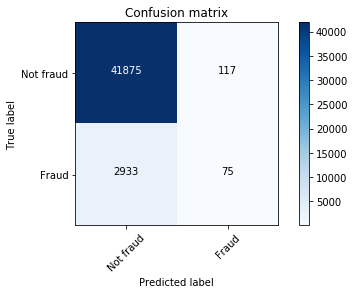


KNN results:
Mean accuracy: 0.9333555555555556
Mean precision: 0.5064935064935064
Mean recall: 0.11668882978723404
AUPRC: 0.11814657901200454
AUROC: 0.5542722106642399


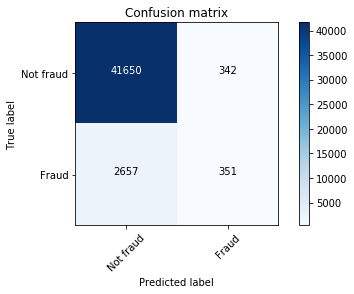

In [6]:
print("Logistic regression results:")
c_scores['logistic_regression'] = futils.classify(X_train, X_test, y_train, y_test, classifier=LogisticRegression(), normalized=False)
print("\nDecision tree results:")
c_scores['decision_tree'] = futils.classify(X_train, X_test, y_train, y_test, classifier=DecisionTreeClassifier(), normalized=False)
print("\nNaive Bayes results:")
c_scores['naive_bayes'] = futils.classify(X_train, X_test, y_train, y_test, classifier=GaussianNB(), normalized=False)
print("\nKNN results:")
c_scores['knn'] = futils.classify(X_train, X_test, y_train, y_test, classifier=KNeighborsClassifier(), normalized=False)

## Scores

In [7]:
scores = pd.DataFrame(c_scores)
scores

,logistic_regression,decision_tree,naive_bayes,knn
AUPRC,0.073955,0.117471,0.074917,0.118147
AUROC,0.507028,0.608080,0.511074,0.554272
accuracy,0.933311,0.896689,0.932222,0.933356
precision,0.542169,0.250986,0.390625,0.506494
recall,0.014960,0.274934,0.024934,0.116689
